In [1]:
from utils import *

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

config = get_config('config.yaml')

[nltk_data] Downloading package stopwords to /Users/enlik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# NLP based Preprocessing

In [2]:
%run ./AR_Miner/AR_util.py
%run ./AR_Miner/AR_reviewInstance.py

# Inputs:
datasetName = "swiftkey" # four apps: facebook, templerun2, swiftkey, tapfish:
# datasetName = "templerun2" # four apps: facebook, templerun2, swiftkey, tapfish
rmStopWords = True # Removing stop words lead to information loss and bad f-score
rmRareWords = True # Remove the word with low frequency
skParse = False # set skParse True to directly read of the data that has been filtered out

# Outputs:
if(skParse == False):
    trainSet, testSet, unlabelSet, vocabulary = AR_parse(datasetName, rmStopWords, rmRareWords)
trainSet[1].printSelf()

Vocabulary size for swiftkey : 1706
Training set Size: 1000
Testing set Size: 2000
Unlabeling set Size: 3282
Review id: 1 Rating: 4 Content: languag select mostli make predict one Ntokens: 6 TS:  Group:  Prob: 0 label: 1
Raw text: when it has 2 languages selected it mostly makes predictions in one


# Naive Bayes based Filtering

In [3]:
%run ./AR_Miner/AR_classifier.py
import time
start_time = time.clock()

useSVM = True # SVM is way better than EMNB in the testing
if(skParse == False):
    if(useSVM == False):
#         informRev, informMat = AR_emnb(trainSet, testSet, unlabelSet, vocabulary, datasetName)
        informRev, uninformRev, informMat = AR_emnb(trainSet, testSet, unlabelSet, vocabulary, datasetName)
    else:
#         informRev, informMat = AR_svm(trainSet, testSet, unlabelSet, vocabulary, datasetName)
        informRev, uninformRev, informMat = AR_svm(trainSet, testSet, unlabelSet, vocabulary, datasetName)
    print(time.clock() - start_time, "seconds")
    # write the result back to the file (optional)
    # AR_writeReviews(informRev, datasetName)
    
else:
    # directly read from the file
    informRev, informMat, vocabulary = AR_loadReviews(datasetName)

print("Number of informative reviews: " + str(len(informRev)))
print("Number of uninformative reviews: " + str(len(uninformRev)))
print('\n')
informRev[1].printSelf()
print('\n')
uninformRev[239].printSelf()

Average F-Score for the test data: 0.7956601356502331
0.13596200000000103 seconds
Number of informative reviews: 788
Number of uninformative reviews: 2494


Review id: 3003 Rating: 1 Content: crash chrome everi minut Ntokens: 4 TS:  Group:  Prob: 1.0 label: 1
Raw text: crashes chrome every 5 minutes


Review id: 3318 Rating: 1 Content: reinstal time last day Ntokens: 4 TS:  Group:  Prob: 0 label: 0
Raw text: again reinstalled 4 times in the last 3 days


# LDA topic clustering

In [4]:
%run ./AR_Miner/AR_lda.py

n_topics = 20 # the number of topics
doc_topic, vocab, top_words_list = AR_lda(informMat, vocabulary, n_topics)

Topic 0: key press option bar space long get
Topic 1: word swipe delet featur remov thing complet
Topic 2: updat seem sinc quit use jelli get
Topic 3: space punctuat type automat period ad turn
Topic 4: keyboard default time everi set phone back
Topic 5: support chines languag pleas input japanes soon
Topic 6: word predict correct auto sometim suggest great
Topic 7: would option swype star give well though
Topic 8: keyboard need samsung switch galaxi swiftkey better
Topic 9: languag download pack get even english type
Topic 10: could one app wish keyboard custom get
Topic 11: text select crash type lag messag time
Topic 12: need keyboard theme button realli good look
Topic 13: keyboard still use one find come put
Topic 14: use app predict love text best even
Topic 15: add theme like pleas would chang make
Topic 16: like would also number set custom symbol
Topic 17: theme wish new dictionari great need person
Topic 18: email address version featur hard instal turn
Topic 19: work type wo

# Ranking Algorithms for Importance

In [5]:
%run ./AR_Miner/AR_ranker.py

wg = [0.85, 0.15]
group_scores, sorted_group_indices = group_rank(doc_topic, wg, informRev)
print('Group scores:\n' + str(group_scores) + '\n')
print('Group in order of importance:\n' + str(sorted_group_indices))

Group scores:
[40.50237476610199, 40.34500241342808, 38.74725348878136, 38.576859356200885, 36.546348515648816, 35.84700252010473, 35.39138591548626, 35.33790449748756, 34.71864628957822, 33.292953279234794, 33.06158981769314, 32.215069829316185, 31.75487471438391, 31.49706555608811, 31.221218438218642, 30.01121764298724, 29.74458168006416, 28.663284949098994, 28.548211244751943, 24.62585033454927]

Group in order of importance:
[15, 17, 5, 0, 19, 7, 2, 6, 4, 9, 8, 12, 16, 11, 3, 10, 1, 13, 14, 18]


In [6]:
%run ./AR_Miner/AR_textrank.py

AR_tfIdf(informRev)
rankrevText = AR_textrank(doc_topic, informRev)

In construct the graph of reviews ---- Nodes: 63 Edges: 86
In construct the graph of reviews ---- Nodes: 36 Edges: 22
In construct the graph of reviews ---- Nodes: 52 Edges: 60
In construct the graph of reviews ---- Nodes: 40 Edges: 38
In construct the graph of reviews ---- Nodes: 43 Edges: 96
In construct the graph of reviews ---- Nodes: 59 Edges: 340
In construct the graph of reviews ---- Nodes: 46 Edges: 12
In construct the graph of reviews ---- Nodes: 40 Edges: 26
In construct the graph of reviews ---- Nodes: 35 Edges: 20
In construct the graph of reviews ---- Nodes: 36 Edges: 104
In construct the graph of reviews ---- Nodes: 33 Edges: 20
In construct the graph of reviews ---- Nodes: 32 Edges: 20
In construct the graph of reviews ---- Nodes: 38 Edges: 34
In construct the graph of reviews ---- Nodes: 25 Edges: 2
In construct the graph of reviews ---- Nodes: 22 Edges: 6
In construct the graph of reviews ---- Nodes: 47 Edges: 120
In construct the graph of reviews ---- Nodes: 29 Edges:

In [7]:
# print the top two reviews of the first five groups:
for i in range(5): # number of groups to print
    print("Instance review for topic group: " + str(i))
    for j in range(2): # number of top reviews to print
        r_ind = rankrevText[i][j][0]
        score = rankrevText[i][j][1]
        print(str(j+1) + "th review " + "Text: " +  informRev[r_ind].text + " Score: " + str(score))
    print ("\n")    

Instance review for topic group: 0
1th review Text: it s a big hassle to change keyboard and key my chinese character Score: 0.02496878242154482
2th review Text: needs more space bar options Score: 0.024968782421544808


Instance review for topic group: 1
1th review Text: i heard that you guys are working on a swipe feature and ill be waiting for it Score: 0.06079018434740193
2th review Text: nice word prediction can t wait for the swipe edition Score: 0.06079018434740193


Instance review for topic group: 2
1th review Text: pls update soon Score: 0.037735824650926654
2th review Text: after last update i noticed my phone begin to lag Score: 0.037735824650926654


Instance review for topic group: 3
1th review Text: and typing is tediously slow having to correct nearly every word Score: 0.03913891801842625
2th review Text: insert dot after pressing double space is disabled Score: 0.03913891801842625


Instance review for topic group: 4
1th review Text: now each and every time my phone is

In [8]:
%run ./AR_Miner/AR_reviewRanking.py

AR_tfIdf(informRev)
weight = [0.25, 0.25, 0.25, 0.25]
rankrevTopic = instance_ranking(doc_topic, weight, informRev)

9th topic has reviews: 53
11th topic has reviews: 56
0th topic has reviews: 76
1th topic has reviews: 50
19th topic has reviews: 67
10th topic has reviews: 55
18th topic has reviews: 43
3th topic has reviews: 54
13th topic has reviews: 52
15th topic has reviews: 77
2th topic has reviews: 68
7th topic has reviews: 68
16th topic has reviews: 65
6th topic has reviews: 71
4th topic has reviews: 55
12th topic has reviews: 60
8th topic has reviews: 60
14th topic has reviews: 52
5th topic has reviews: 78
17th topic has reviews: 82


# Visualization

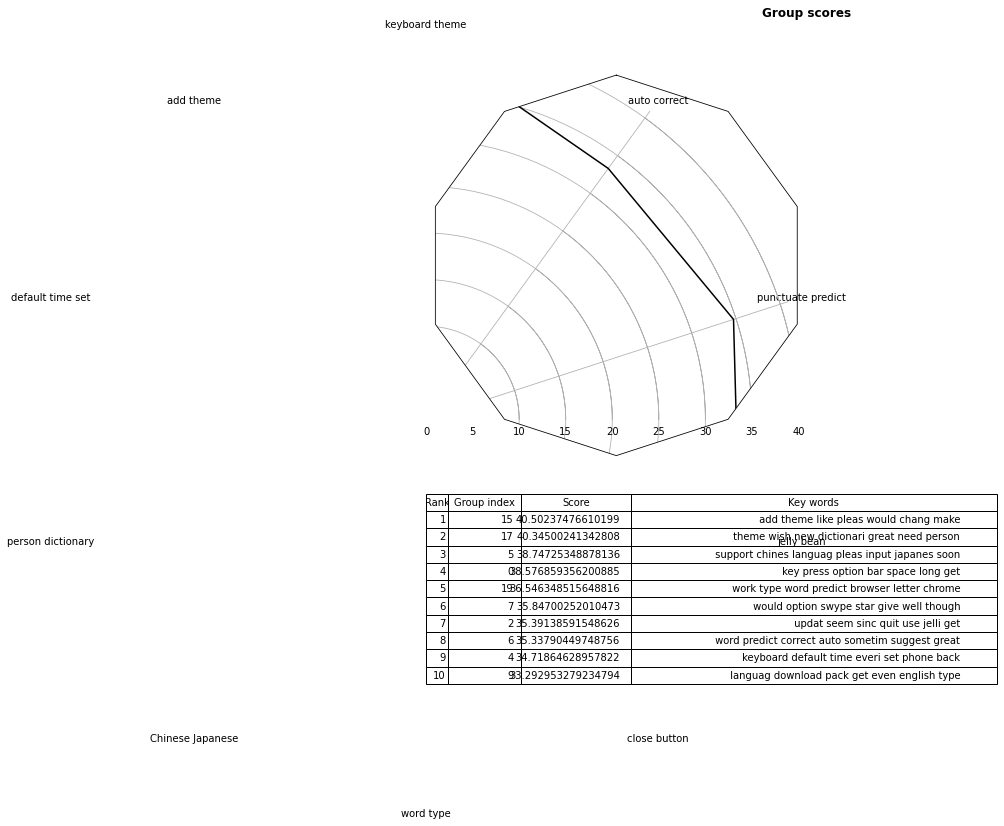

Ranking all the reviews in the first group via text rank


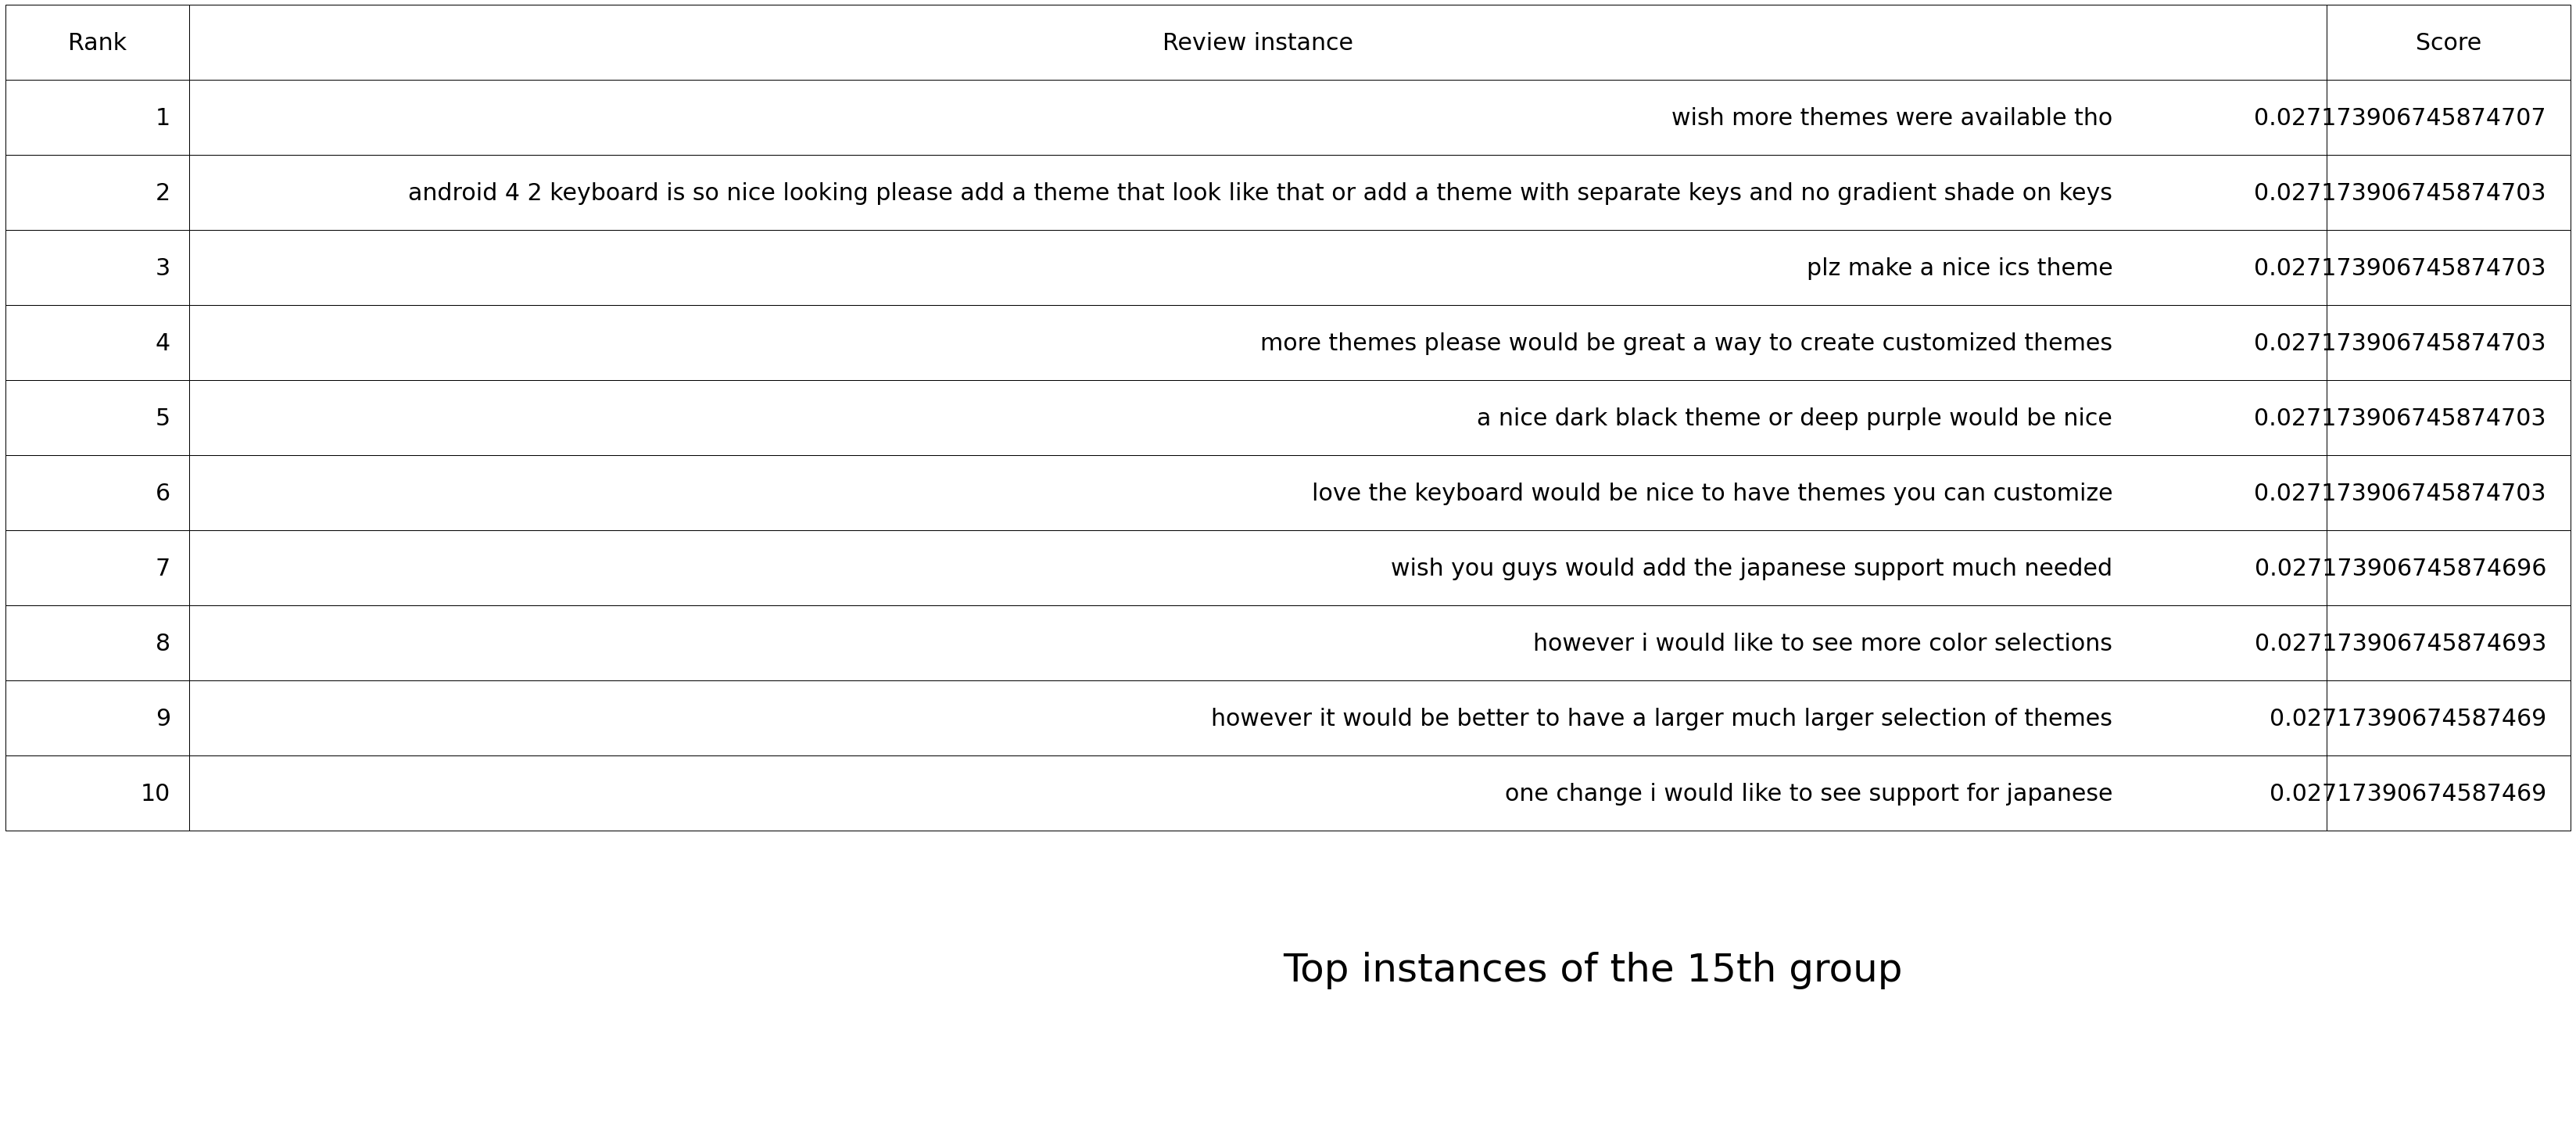

Ranking all the reviews in the first group via topic modeling


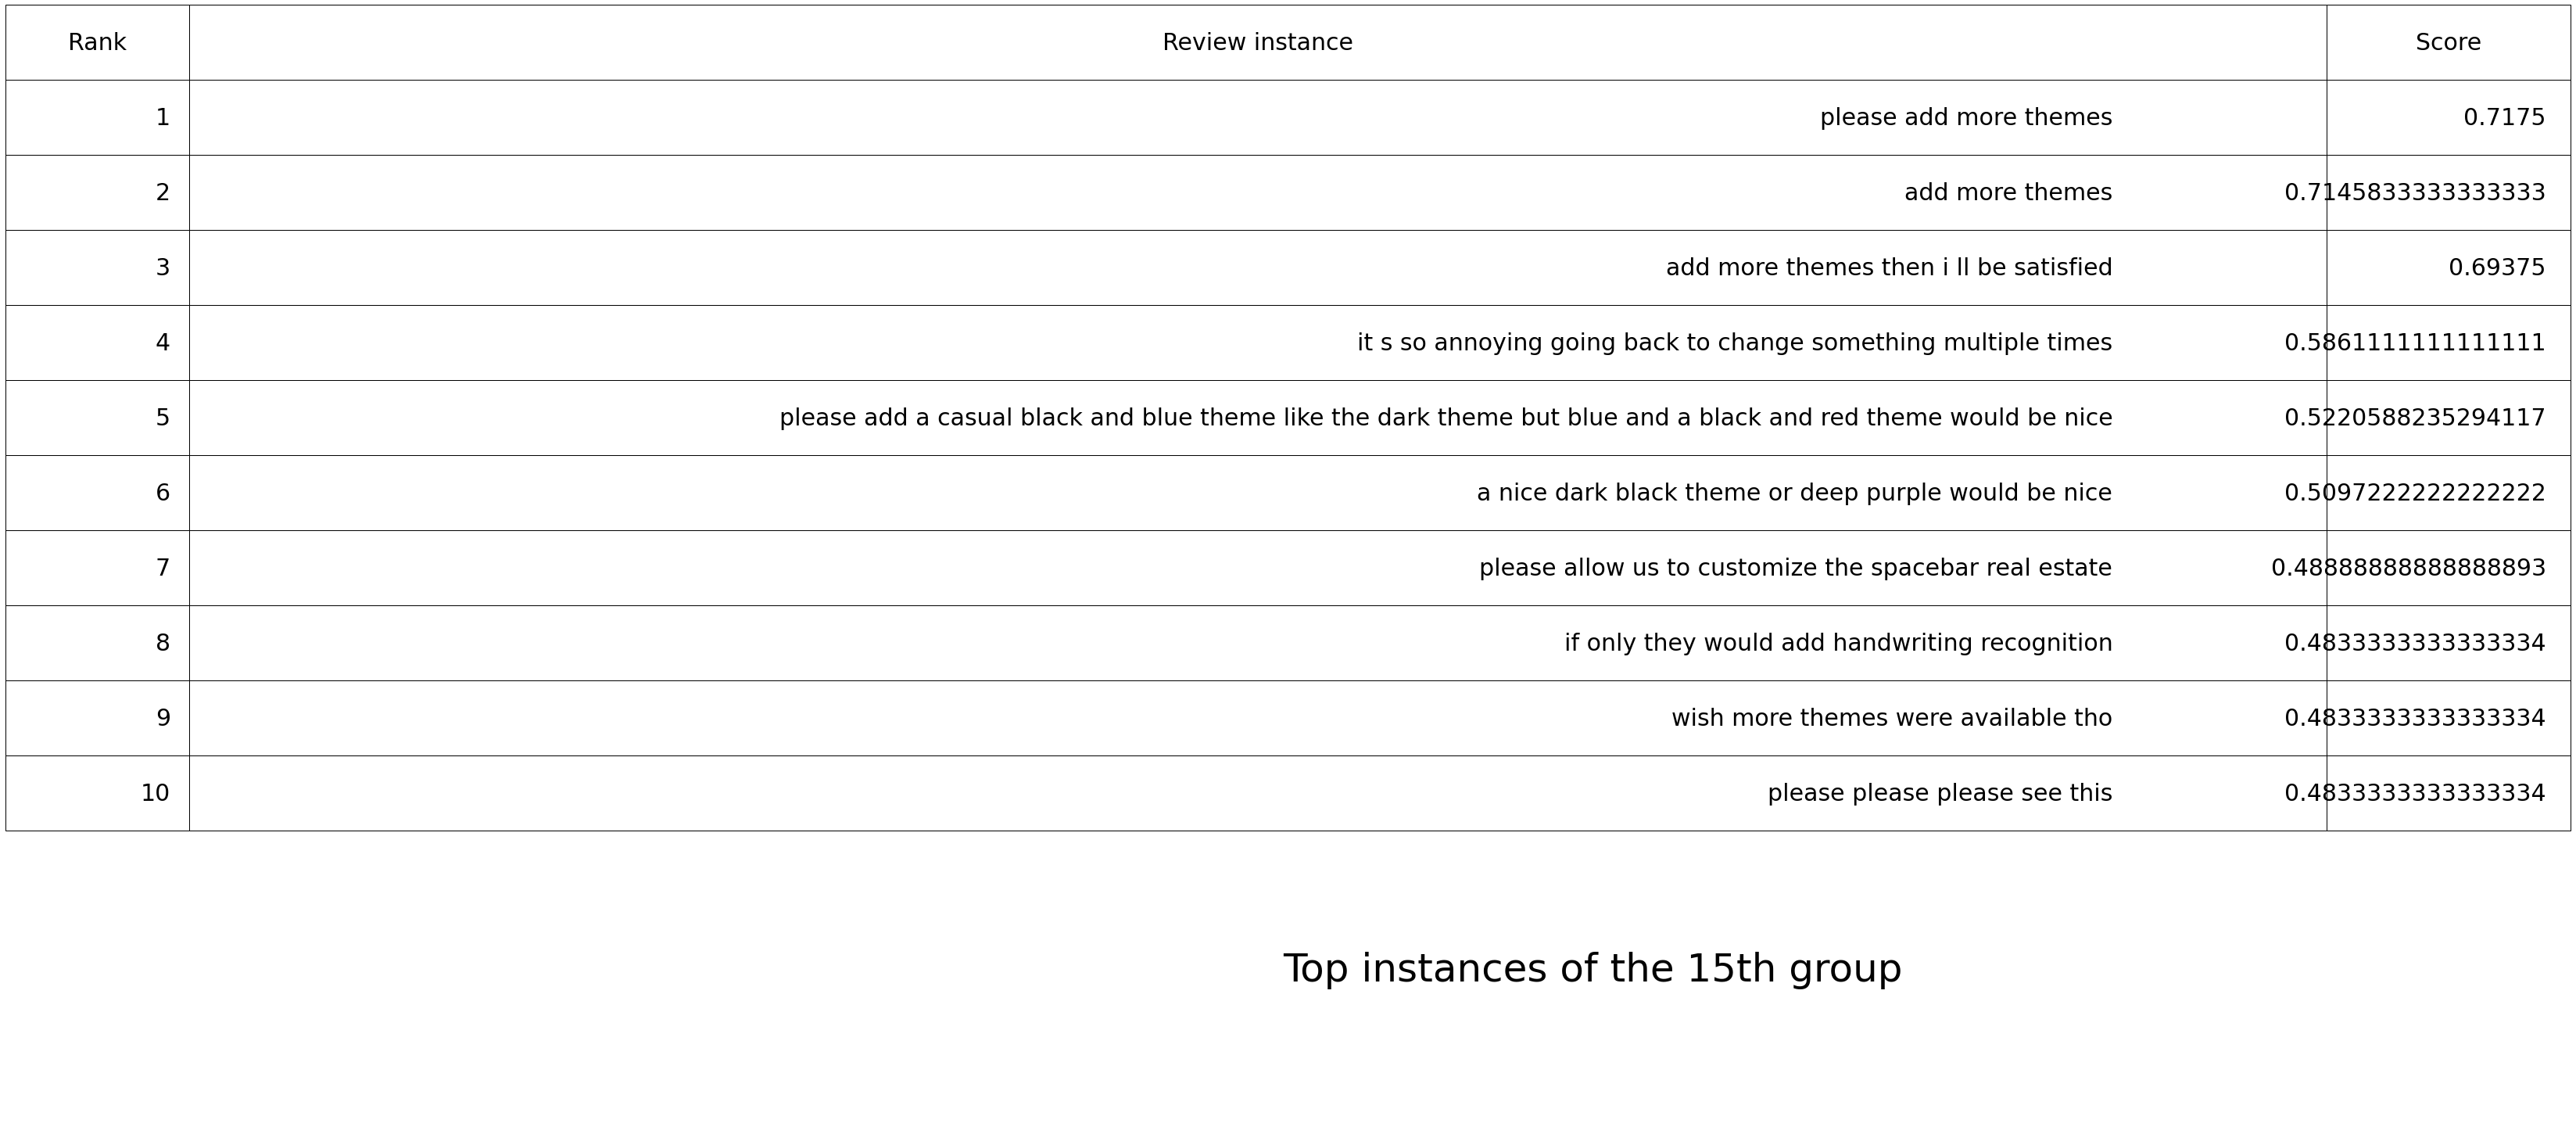

In [9]:
%run ./AR_Miner/AR_visualization.py

group_count = 10
plot_group_ranking(group_scores, sorted_group_indices, top_words_list, group_count)
print("Ranking all the reviews in the first group via text rank")
plot_instance_ranking(sorted_group_indices[0], informRev, rankrevText, 10)
print("Ranking all the reviews in the first group via topic modeling")
plot_instance_ranking(sorted_group_indices[0], informRev, rankrevTopic, 10)